# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


In [511]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train-data.csv')
df.head(5)# understanding the dataset 


Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [513]:
df.info()#Checking the infomation about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [514]:
df.shape

(6019, 14)

# 2. Loading and Cleaning with Pandas

In [515]:
df.isnull().sum()
#Checking the missing values

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [516]:
df.duplicated().sum()

0

In [517]:
df.shape

(6019, 14)

In [518]:
df.isnull().sum()#checking the null value

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [519]:
#Droping colums with null value
df.dropna(subset=['Mileage'],inplace =True) 
df.dropna(subset=['Engine'],inplace =True) 
df.dropna(subset=['Power'],inplace =True) 
df.dropna(subset=['Seats'],inplace =True) 
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop('New_Price',axis=1) 
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [520]:
#Converting string to float 
mileage = [float(mileage.split(" ")[0]) for mileage in df.Mileage]
df['Mileage'] = mileage
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage   Engine      Power  Seats  Price  
0       CNG       Manual      First    26.60   998 CC  58.16 bhp    5.0   1.75  
1    Diesel       Manual      First    19.67  1582 CC  126.2 bhp    5.0  12.50  
2    Petrol       Manual      First    18.20  1199 CC   88.7 bhp    5.0   4.50  
3    Diesel       Manual      First    20.77  1248 CC  88.76 bhp    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968 CC  140.8 bhp    5.0  17.74

In [521]:
engine = [float(str(engine).split(" ")[0]) for engine in df.Engine]
df['Engine'] = engine
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine      Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0  58.16 bhp    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.2 bhp    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.7 bhp    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0  88.76 bhp    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.8 bhp    5.0  17.74

In [522]:
power = [power.replace("null", '0') for power in df.Power]
df['Power'] = power
# df.head()

In [523]:
power = [float(power.split(" ")[0]) for power in df.Power]
df['Power'] = power
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74

In [524]:
# Also Change the dtype of Power
pd.to_numeric(df['Power'], errors='coerce')

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 5975, dtype: float64

In [525]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [526]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [527]:
df.Fuel_Type.value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [528]:
 # Get the count of different value of Transmission 
df.Transmission.value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

In [529]:
# Convert the Transmission values to 1 or 0. If the Transmission is Manual give a value = 1, for Automatic give value = 0
def get_transmission(value):
    if value == 'Manual':
        return 1
    else:
        return 0

In [530]:
df.Transmission = df.Transmission.map(get_transmission)
df.head(10)

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
5      Hyundai EON LPG Era Plus Option   Hyderabad  2012              75000   
6               Nissan Micra Diesel XV      Jaipur  2013              86999   
7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016              36000   
8  Volkswagen Vento Diesel Comfortline        Pune  2013              64430   
9       Tata Indica Vista Quadrajet LS     Chennai  2012              65932   

  Fuel_Type  Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG             1      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel             1      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol             1      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel             1      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel             0     Second    15.20  1968.0  140.80    5.0  17.74  
5       LPG             1      First    21.10   814.0   55.20    5.0   2.35  
6    Diesel             1      First    23.08  1461.0   63.10    5.0   3.50  
7    Diesel             0      First    11.36  2755.0  171.50    8.0  17.50  
8    Diesel             1      First    20.54  1598.0  103.60    5.0   5.20  
9    Diesel             1     Second    22.30  1248.0   74.00    5.0   1.95

# 3.  EDA and Visualization

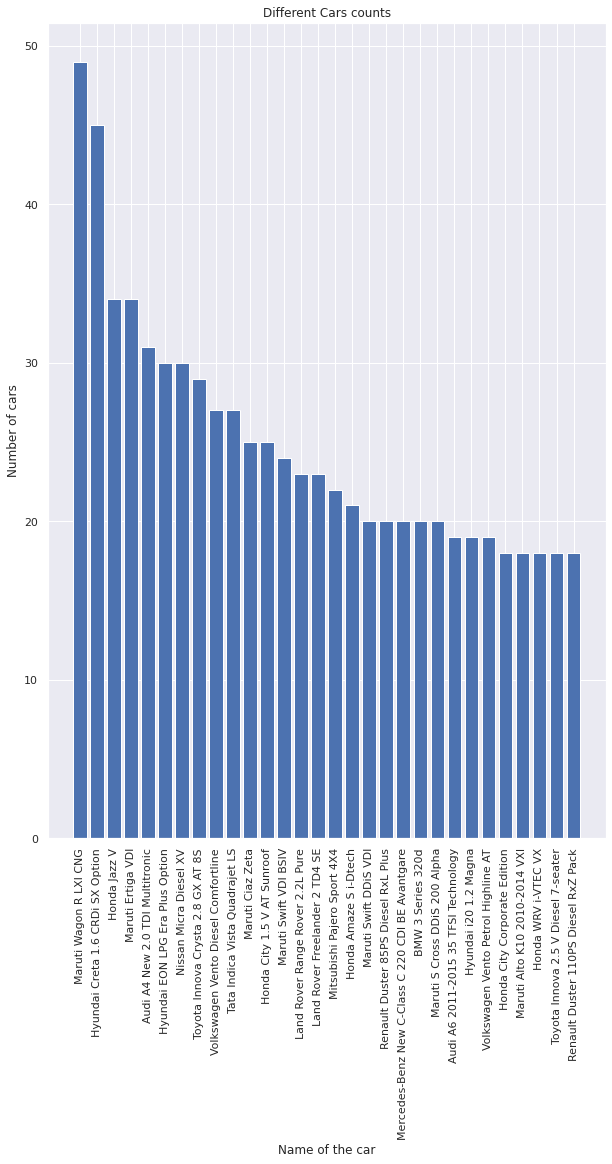

In [531]:
#visalize count of the cars
x = df.Name.unique()[:30]
y = df.Name.value_counts()[:30]
plt.bar(x,y)
plt.title('Different Cars counts')
plt.xlabel('Name of the car')
plt.ylabel('Number of cars')

plt.xticks(rotation= 90)
plt.show()

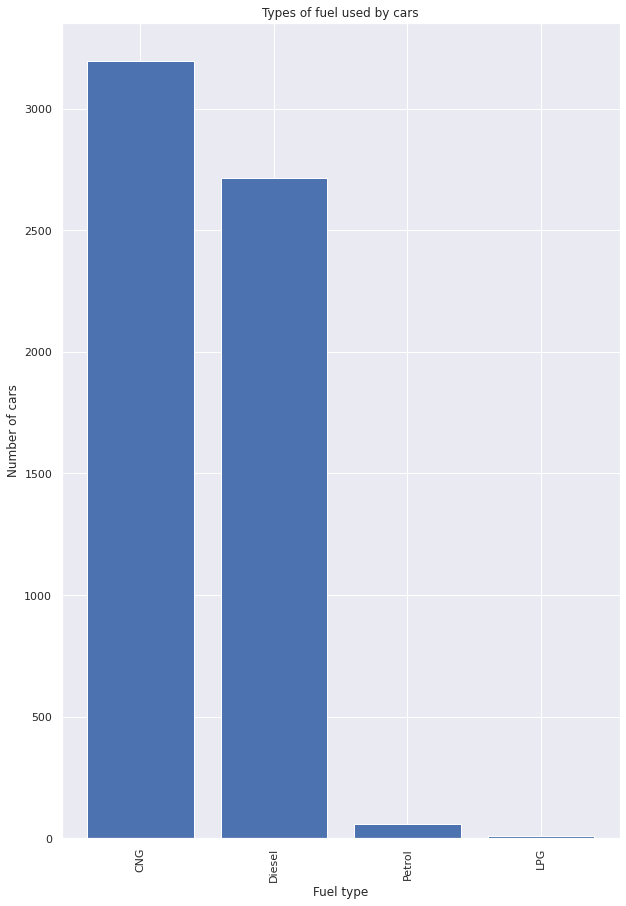

In [532]:
#visualize types of fuel used by the cars
x = df.Fuel_Type.unique()[:30]
y = df.Fuel_Type.value_counts()[:30]
plt.bar(x,y)
plt.title('Types of fuel used by cars')
plt.xlabel('Fuel type')
plt.ylabel('Number of cars')

plt.xticks(rotation= 90)
plt.show()

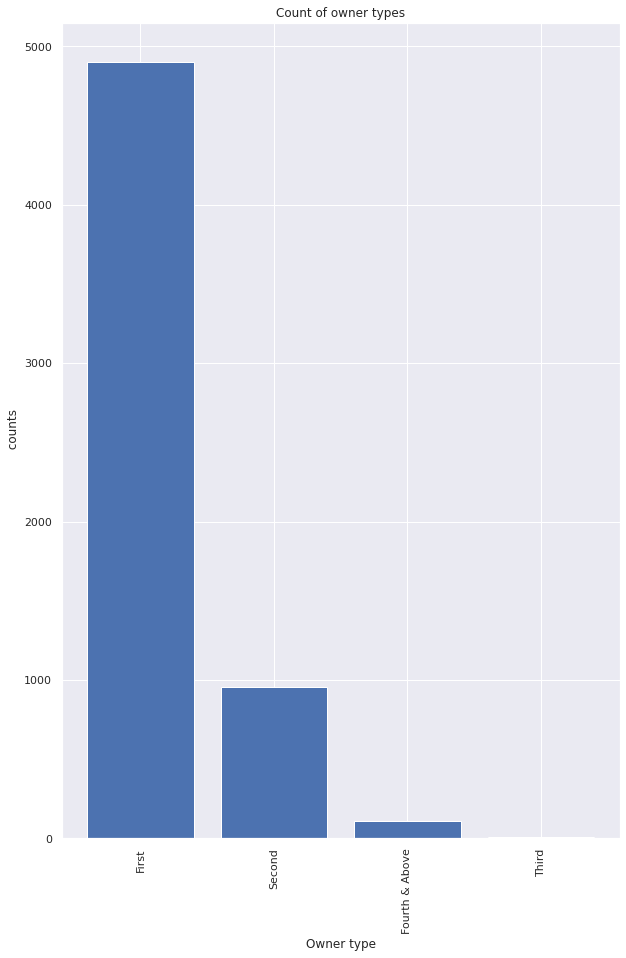

In [533]:
#visualize owner type
x = df.Owner_Type.unique()[:30]
y = df.Owner_Type.value_counts()[:30]
plt.bar(x,y)
plt.title('Count of owner types')
plt.xlabel('Owner type')
plt.ylabel(' counts')

plt.xticks(rotation= 90)
plt.show()

In [534]:

# A high correlation can help us use dimension reduction, I will try to see the correlations
corr = df.corr() 
corr

Year  Kilometers_Driven  Transmission   Mileage  \
Year               1.000000          -0.172663     -0.095812  0.314417   
Kilometers_Driven -0.172663           1.000000      0.025870 -0.064991   
Transmission      -0.095812           0.025870      1.000000  0.342504   
Mileage            0.314417          -0.064991      0.342504  1.000000   
Engine            -0.052538           0.090832     -0.501056 -0.598638   
Power              0.069787           0.024375     -0.635513 -0.453399   
Seats              0.012338           0.083101      0.075325 -0.308226   
Price              0.305800          -0.011263     -0.586075 -0.313877   

                     Engine     Power     Seats     Price  
Year              -0.052538  0.069787  0.012338  0.305800  
Kilometers_Driven  0.090832  0.024375  0.083101 -0.011263  
Transmission      -0.501056 -0.635513  0.075325 -0.586075  
Mileage           -0.598638 -0.453399 -0.308226 -0.313877  
Engine             1.000000  0.842507  0.393435  0.659117  
Power              0.842507  1.000000  0.108638  0.759749  
Seats              0.393435  0.108638  1.000000  0.052262  
Price              0.659117  0.759749  0.052262  1.000000

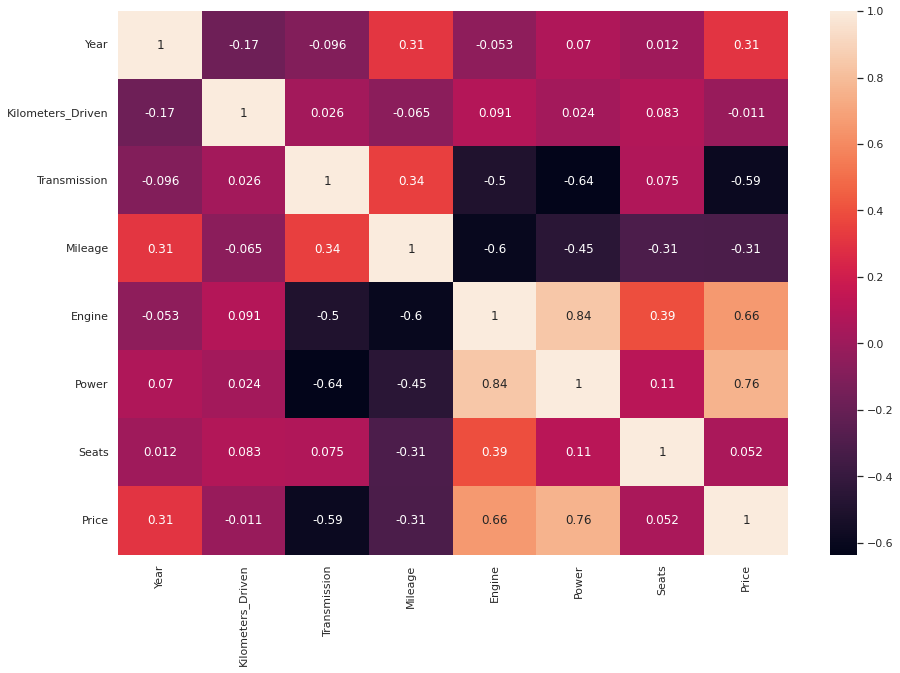

In [535]:
# visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

# 4. Feature Engineering 

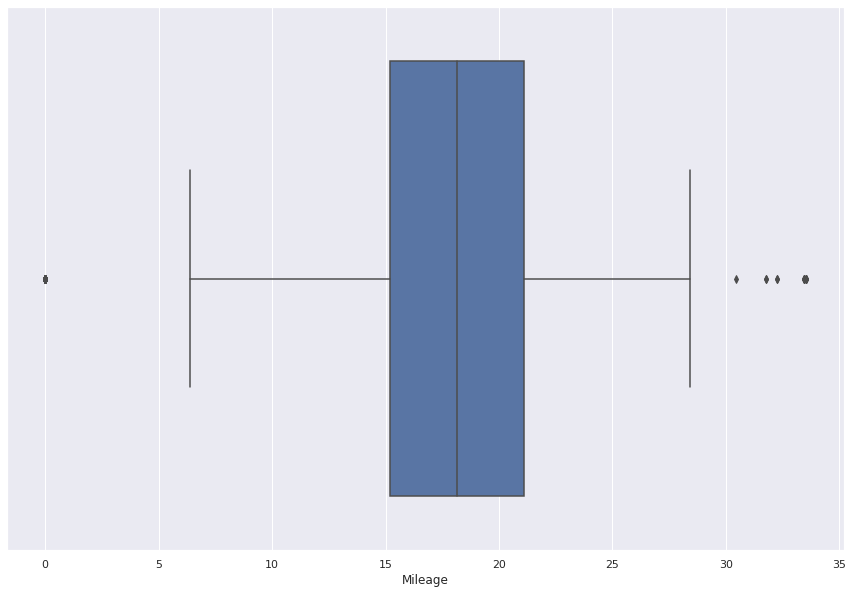

In [536]:
 ## ploting boxplot to check outliers
sns.boxplot(x=df['Mileage'])
plt.show()

In [537]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df.Mileage.quantile(0.25)
Q3 = df.Mileage.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [538]:
 ## checking outlier
df[(df.Mileage < lowerlimit)  | (df.Mileage > upperlimit)]

Name    Location  Year  \
14              Land Rover Freelander 2 TD4 SE        Pune  2012   
67    Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019   
79                      Hyundai Santro Xing XL   Hyderabad  2005   
262                     Hyundai Santro Xing XL   Hyderabad  2006   
307                     Hyundai Santro Xing XL     Chennai  2006   
...                                        ...         ...   ...   
5875  Mercedes-Benz C-Class Progressive C 220d   Ahmedabad  2019   
5935                   Maruti Alto K10 LXI CNG        Pune  2015   
5943                   Mahindra Jeep MM 540 DP     Chennai  2002   
5972                    Hyundai Santro Xing GL      Mumbai  2008   
6011                   Skoda Superb 3.6 V6 FSI   Hyderabad  2009   

      Kilometers_Driven Fuel_Type  Transmission Owner_Type  Mileage  Engine  \
14                85000    Diesel             0     Second     0.00  2179.0   
67                15369    Diesel             0      First     0.00  1950.0   
79                87591    Petrol             1      First     0.00  1086.0   
262               99000    Petrol             1      First     0.00  1086.0   
307               58000    Petrol             1     Second     0.00  1086.0   
...                 ...       ...           ...        ...      ...     ...   
5875               4000    Diesel             0      First     0.00  1950.0   
5935              59525       CNG             1     Second    32.26   998.0   
5943              75000    Diesel             1      First     0.00  2112.0   
5972              65000    Petrol             1     Second     0.00  1086.0   
6011              53000    Petrol             0      First     0.00  3597.0   

      Power  Seats  Price  
14    115.0    5.0  17.50  
67    194.0    5.0  35.67  
79      0.0    5.0   1.30  
262     0.0    5.0   1.75  
307     0.0    5.0   1.50  
...     ...    ...    ...  
5875  194.0    5.0  35.00  
5935   58.2    4.0   3.10  
5943    0.0    6.0   1.70  
5972   62.0    5.0   1.39  
6011  262.6    5.0   4.75  

[70 rows x 12 columns]

In [539]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = df[(df.Mileage > lowerlimit) & (df.Mileage < upperlimit)]
df1.shape

(5905, 12)

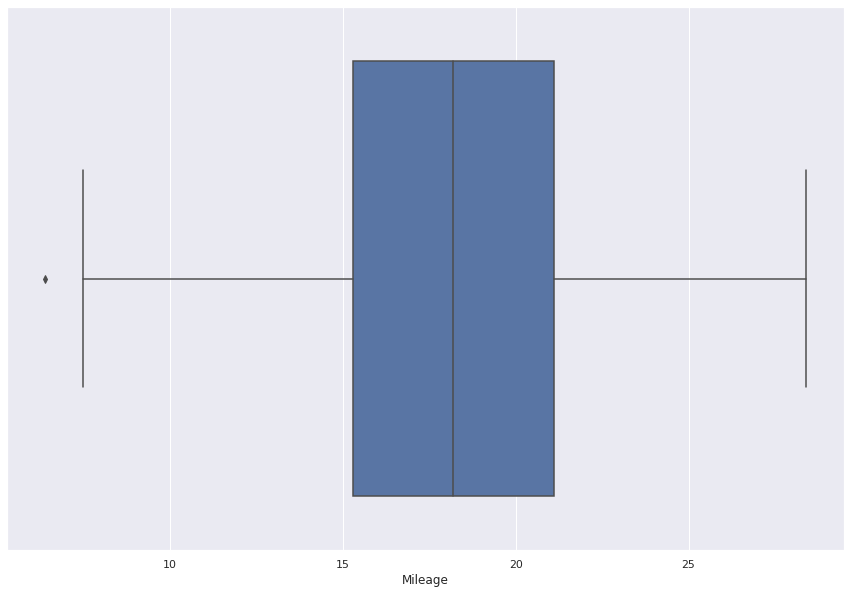

In [540]:
 ## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Mileage'])
plt.show()

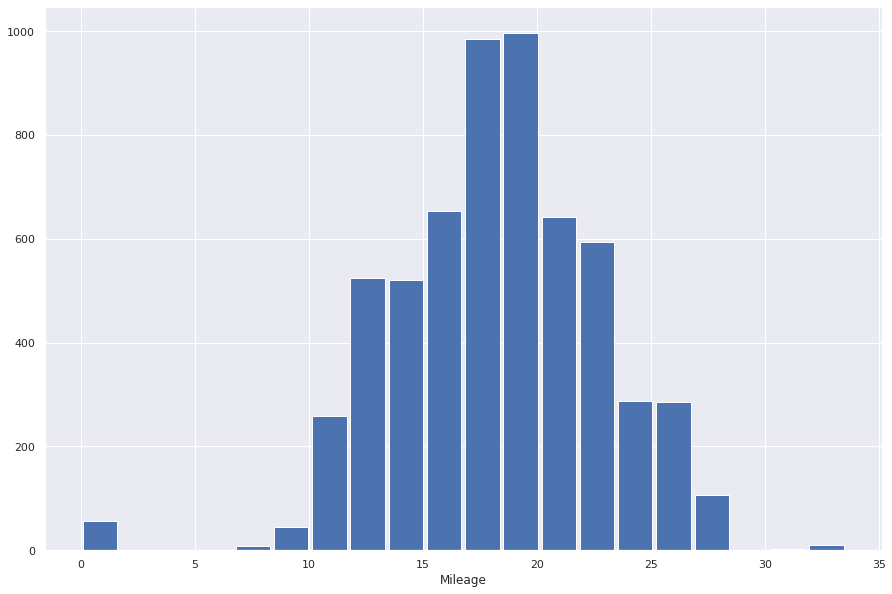

In [541]:
plt.hist(df.Mileage,bins=20,rwidth=0.9)
plt.xlabel('Mileage')
plt.show()

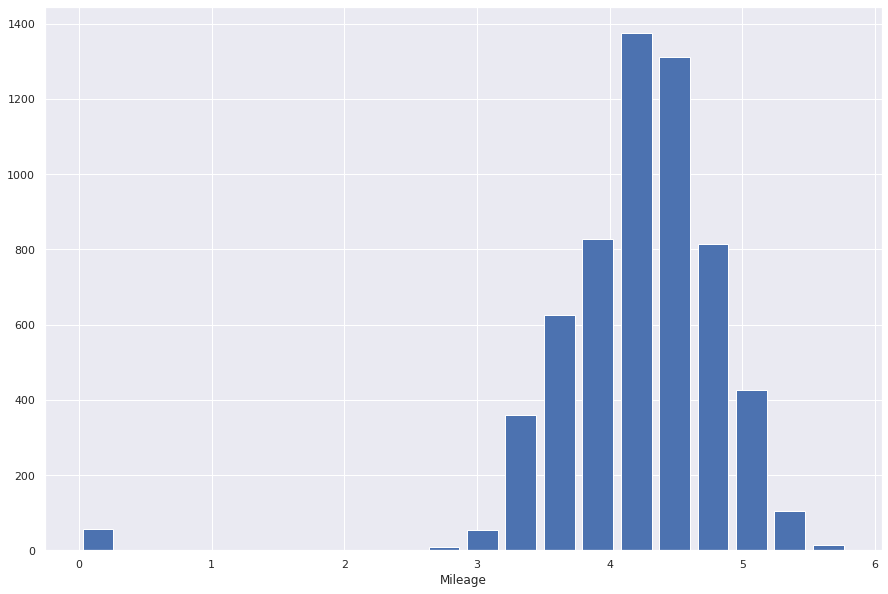

In [542]:
#square root transformation
x = np.sqrt(df.Mileage)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Mileage")
plt.show()

In [543]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission           int64
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [544]:
numeric_columns = ['Year','Kilometers_Driven','Transmission','Mileage', 'Engine', 'Power', 'Seats', 'Price']
numericDf = df[numeric_columns]

In [545]:
numericDf.isnull().sum()

Year                 0
Kilometers_Driven    0
Transmission         0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [546]:
numericDf.bfill(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [547]:
numericDf.head()

Year  Kilometers_Driven  Transmission  Mileage  Engine   Power  Seats  \
0  2010              72000             1    26.60   998.0   58.16    5.0   
1  2015              41000             1    19.67  1582.0  126.20    5.0   
2  2011              46000             1    18.20  1199.0   88.70    5.0   
3  2012              87000             1    20.77  1248.0   88.76    7.0   
4  2013              40670             0    15.20  1968.0  140.80    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [548]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericDf)

In [549]:
 #dataframe after scaling
transformdf = pd.DataFrame(numeric,columns=numeric_columns)
transformdf.head()

Year  Kilometers_Driven  Transmission   Mileage    Engine     Power  \
0  0.571429           0.011051           1.0  0.793083  0.069594  0.103857   
1  0.809524           0.006282           1.0  0.586464  0.178266  0.225357   
2  0.619048           0.007051           1.0  0.542636  0.106997  0.158393   
3  0.666667           0.013359           1.0  0.619261  0.116115  0.158500   
4  0.714286           0.006231           0.0  0.453190  0.250093  0.251429   

   Seats     Price  
0    0.5  0.008210  
1    0.5  0.075583  
2    0.5  0.025445  
3    0.7  0.034846  
4    0.5  0.108423

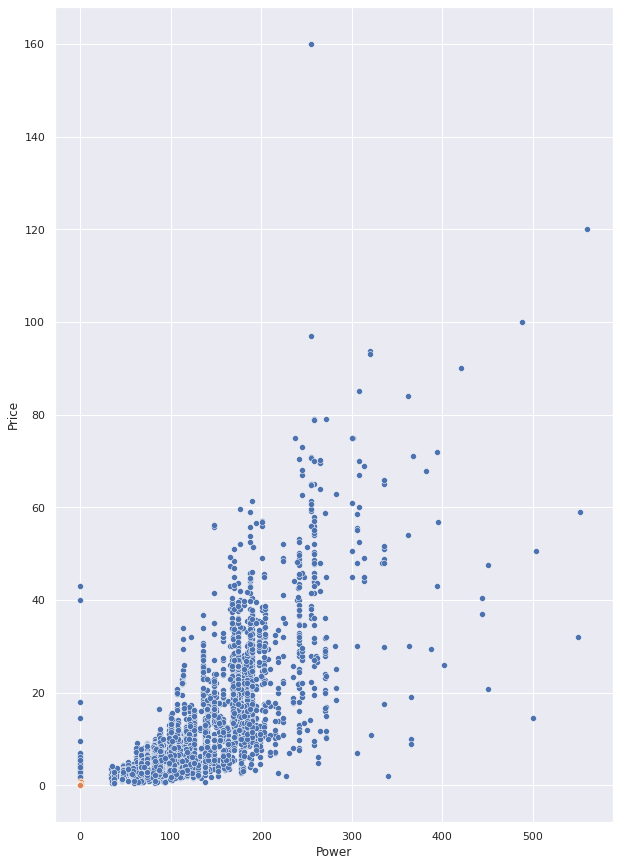

In [550]:
sns.set(rc={'figure.figsize':(10,15)})

sns.scatterplot(data=df,x='Power',y='Price')
sns.scatterplot(data = transformdf,x='Power',y='Price')
plt.show()

In [551]:
#Encoding Categorical Variables
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type  Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG             1      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel             1      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol             1      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel             1      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel             0     Second    15.20  1968.0  140.80    5.0  17.74

In [552]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Fuel_Type' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Fuel_Type']]).toarray())
encoder_df.columns = ['CNG', 'DIESEL', 'PETROL', 'LPG']


#merge one-hot encoded columns back with transformdf DataFrame
transformdf = transformdf.join(encoder_df)

#view final df
transformdf.head()

Year  Kilometers_Driven  Transmission   Mileage    Engine     Power  \
0  0.571429           0.011051           1.0  0.793083  0.069594  0.103857   
1  0.809524           0.006282           1.0  0.586464  0.178266  0.225357   
2  0.619048           0.007051           1.0  0.542636  0.106997  0.158393   
3  0.666667           0.013359           1.0  0.619261  0.116115  0.158500   
4  0.714286           0.006231           0.0  0.453190  0.250093  0.251429   

   Seats     Price  CNG  DIESEL  PETROL  LPG  
0    0.5  0.008210  1.0     0.0     0.0  0.0  
1    0.5  0.075583  0.0     1.0     0.0  0.0  
2    0.5  0.025445  0.0     0.0     0.0  1.0  
3    0.7  0.034846  0.0     1.0     0.0  0.0  
4    0.5  0.108423  0.0     1.0     0.0  0.0

In [553]:
#Ordinal Encoder
ownerdf = df[['Owner_Type']]
from sklearn.preprocessing import OrdinalEncoder
oe =  OrdinalEncoder()  
df['Owner_Type'] = oe.fit_transform(df[['Owner_Type']])
ownerdf

Owner_Type
0         First
1         First
2         First
3         First
4        Second
...         ...
6014      First
6015      First
6016     Second
6017      First
6018      First

[5975 rows x 1 columns]

**Univariate feature selection using selectKBest**

In [554]:
#Feature Selection
 # All the numerical columns
traincol = ['Year','Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
traindf = df[traincol]

In [555]:
traindf.isna().sum() 

Year                 0
Kilometers_Driven    0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [556]:
# Selecting X by dropping Price
X = traindf.drop(['Price'],axis=1)

# target feature
Y = traindf.Price

In [557]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
fs = SelectKBest(score_func=f_regression,k=5)

#apply feature selection on X_train
X_selected = fs.fit_transform(X,Y)

In [558]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2) 

In [559]:
# A high correlation can help us use dimension reduction, I will try to see the correlations
corr = traindf.corr() 
corr

Year  Kilometers_Driven  Owner_Type   Mileage  \
Year               1.000000          -0.172663   -0.383082  0.314417   
Kilometers_Driven -0.172663           1.000000    0.079772 -0.064991   
Owner_Type        -0.383082           0.079772    1.000000 -0.153497   
Mileage            0.314417          -0.064991   -0.153497  1.000000   
Engine            -0.052538           0.090832    0.049909 -0.598638   
Power              0.069787           0.024375    0.007439 -0.453399   
Seats              0.012338           0.083101    0.003672 -0.308226   
Price              0.305800          -0.011263   -0.094207 -0.313877   

                     Engine     Power     Seats     Price  
Year              -0.052538  0.069787  0.012338  0.305800  
Kilometers_Driven  0.090832  0.024375  0.083101 -0.011263  
Owner_Type         0.049909  0.007439  0.003672 -0.094207  
Mileage           -0.598638 -0.453399 -0.308226 -0.313877  
Engine             1.000000  0.842507  0.393435  0.659117  
Power              0.842507  1.000000  0.108638  0.759749  
Seats              0.393435  0.108638  1.000000  0.052262  
Price              0.659117  0.759749  0.052262  1.000000

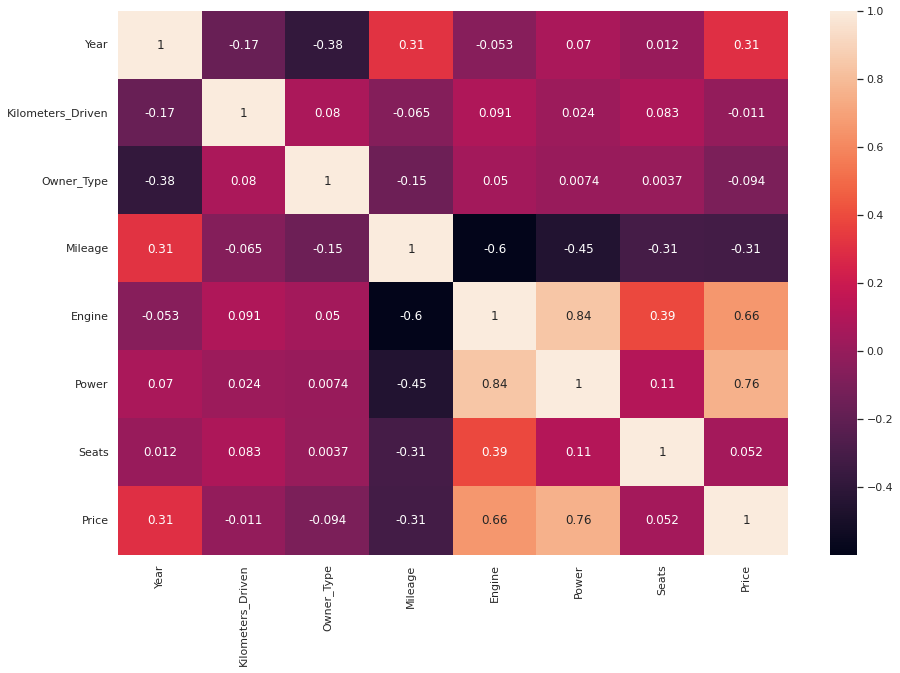

In [560]:
# visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

# 5. Training Model

In [561]:
model = LinearRegression()
model

LinearRegression()

In [562]:
LinearRegression()

LinearRegression()

In [563]:
model.fit(X_train,y_train)
LinearRegression()

LinearRegression()

In [564]:
model.coef_

array([ 1.06981801e+00,  2.10399916e-06, -5.17558827e-02, -1.61478077e-01,
        5.30323411e-03,  9.78125942e-02, -1.92678882e+00])

In [565]:
model.intercept_

-2150.922700050373

# 6. Prediction

In [566]:
y_pred = model.predict(X_test)
y_pred

array([10.82137538,  8.05780776,  5.42188457, ..., 23.07685892,
        1.18921688,  8.31819275])

# 7. Evaluating your Model

In [567]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 4.074996315622452
Mean Squared Error: 40.94785356305814
Root Mean Squared Error: 6.399050989252871
R2 score : 0.649162


In [568]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_test)

print("Accuracy on train data: ",r2_score(y_train,Y_train_predicted))
print("Accuracy on test set: ",r2_score(y_test,Y_test_predicted))

Accuracy on train data:  0.6653050845716324
Accuracy on test set:  0.6491620705485608


In [569]:
model.score(X_train, y_train)
 

0.6653050845716324

In [570]:
model.score(X_test, y_test)
 

0.6491620705485608

In [571]:
Result = pd.DataFrame({"Actual Price":y_test,"Predicted Price":Y_test_predicted})
Result.head(10)

Actual Price  Predicted Price
5723         11.00        10.821375
2381          8.30         8.057808
5285          4.90         5.421885
4            17.74        14.723373
1414          2.50         2.309553
2153         38.50        25.153822
1392          5.67         7.905214
5874         24.00        17.395117
3848          2.60         0.864905
642           2.65         3.817295

In [573]:
#Training the model using the XSelected by KBest 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
fs = SelectKBest(score_func=f_regression,k=7)

#apply feature selection on X_train
X_selected = fs.fit_transform(X_train,y_train)

In [574]:
X_selected.shape 

(4780, 7)

In [575]:
modelk = LinearRegression()

modelk.fit(X_selected, y_train) 

LinearRegression()

In [576]:
#Score of Model trained using KBest feature selection
modelk.score(X_selected, y_train)
 

0.6653050845716324

In [577]:

X_selected = fs.fit_transform(X_test, y_test)
X_selected[0]

array([2.013e+03, 3.000e+04, 2.000e+00, 1.480e+01, 1.595e+03, 1.207e+02,
       5.000e+00])

In [578]:
X_selected.shape
 

(1195, 7)

In [579]:
modelk.fit(X_selected, y_test)
 

LinearRegression()

In [580]:
LinearRegression()

LinearRegression()

In [581]:
modelk.score(X_selected, y_test)
 

0.6563921371796104

# SUBMISSION DATE: 2nd April 2022